In [1]:
#run: pip install openquantumcomputing
import sys
sys.path.insert(0, '/home/franzf/OpenQuantumComputing/OpenQuantumComputing/')
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

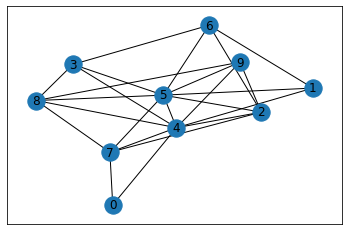

In [3]:
numV=10
G = nx.read_gml("../../data/sample_graphs/w_ba_n"+str(numV)+"_k4_0.gml")
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)

In [4]:
params={'G': G}
qaoamc = QAOAMaxCut(params=params)

In [5]:
import itertools
costs=[]
for s in [''.join(i) for i in itertools.product('01', repeat =numV)]:
    tmp=-qaoamc.cost(s)
    costs.append(tmp)
mincost=min(costs)
print("minimum cost=",mincost)

minimum cost= -8.657714089848158


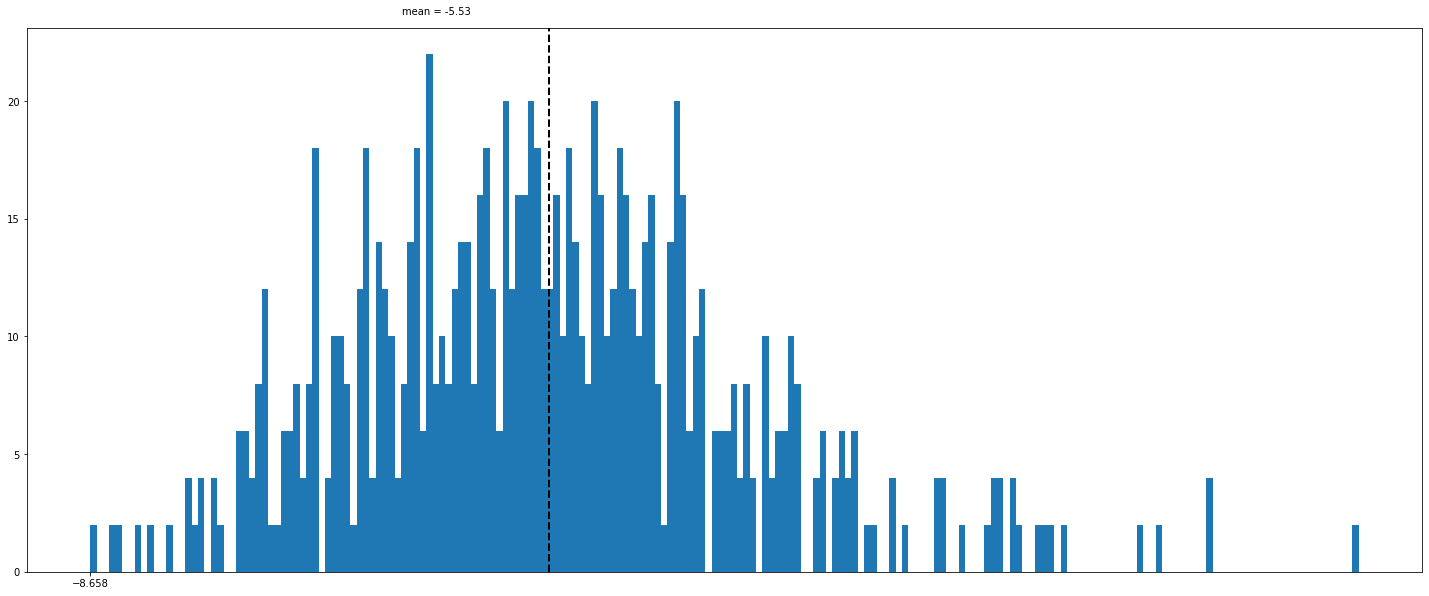

In [6]:
max_val=max(costs)

pl.figure(figsize=(25,10))
_=pl.hist(np.sort(costs), bins=200)
min_ylim, max_ylim = pl.ylim()
max_ylim *=1.025
mean=np.mean(costs)
pl.axvline(mean, color='k', linestyle='dashed', linewidth=2)
_=pl.text(mean-1, max_ylim, 'mean = {:.2f}'.format(mean))
_=pl.xticks(np.arange(mincost, max_val, step=25))

In [7]:
qasm_sim = Aer.get_backend('qasm_simulator')

In [8]:
qaoamc.sample_cost_landscape(qasm_sim, 1024, angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi,20]})

Calculating Energy landscape for depth p=1...
Calculating Energy landscape done


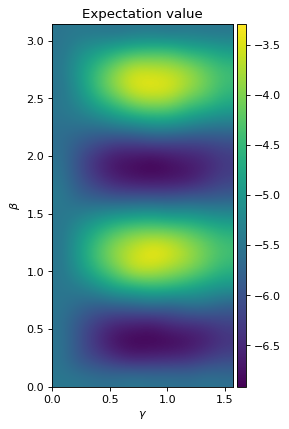

In [9]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

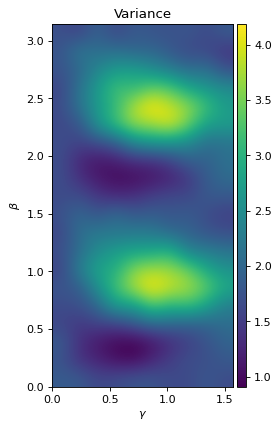

In [10]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Variance')
im = ax.imshow(qaoamc.Var,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

In [11]:
maxdepth=20
for i in range(maxdepth):
    qaoamc.increase_depth(qasm_sim, precision=0.025)

cost(depth= 1 )= -6.885221522647028
cost(depth= 2 )= -7.2456018218588545
cost(depth= 3 )= -7.6609350683291195
cost(depth= 4 )= -7.829517471548112
cost(depth= 5 )= -7.984141695882387
cost(depth= 6 )= -8.118454302393989
cost(depth= 7 )= -8.187724780788209
cost(depth= 8 )= -8.15728923522361
cost(depth= 9 )= -8.23098881616703
cost(depth= 10 )= -8.275981383977296
cost(depth= 11 )= -8.335640694423041
cost(depth= 12 )= -8.358854720557055
cost(depth= 13 )= -8.365540190132792
cost(depth= 14 )= -8.42702858980266
cost(depth= 15 )= -8.472487944247215
cost(depth= 16 )= -8.44155770329371
cost(depth= 17 )= -8.432296834836746
cost(depth= 18 )= -8.463154100599223
cost(depth= 19 )= -8.441064252059084
cost(depth= 20 )= -8.480470437244112


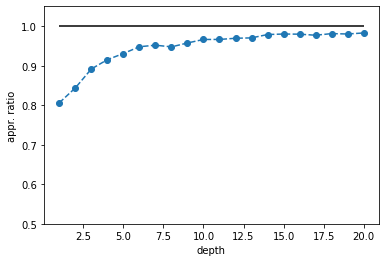

In [12]:
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoamc.costval.values()))/mincost,'o--')
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
pl.ylim(0.5,1.05)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')

In [20]:
hist=qaoamc.hist(qaoamc.angles_hist['d20_final'], qasm_sim,8*1024)
bins={}
for key in hist:
    c=-qaoamc.cost(key)
    bins[c]=bins.get(c,0)
    bins[c]+=hist[key]
bins=dict(sorted(bins.items()))

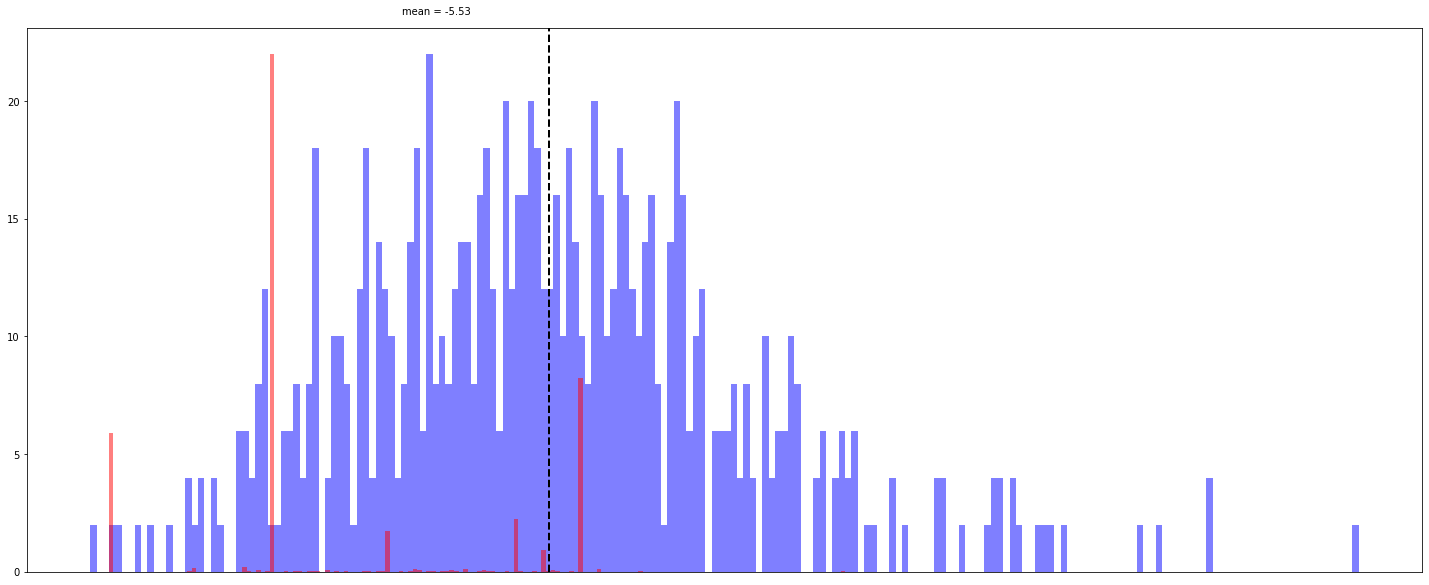

In [21]:
max_val=max(costs)

pl.figure(figsize=(25,10))
_=pl.hist(np.sort(costs), bins=200, alpha = 0.5, color= 'b')
w=np.array(list(bins.values()))
_=pl.hist(bins.keys(),bins=200,weights=w/max(w)*22, alpha = 0.5, color= 'r')
min_ylim, max_ylim = pl.ylim()
max_ylim *=1.025
mean=np.mean(costs)
pl.axvline(mean, color='k', linestyle='dashed', linewidth=2)
_=pl.text(mean-1, max_ylim, 'mean = {:.2f}'.format(mean))
_=pl.xticks(np.arange(0, max_val, step=25))

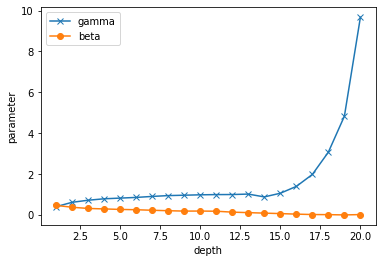

In [15]:
pl.plot(np.arange(1,maxdepth+1),qaoamc.angles_hist['d'+str(maxdepth)+'_final'][::2],"x-",label='gamma')
pl.plot(np.arange(1,maxdepth+1),qaoamc.angles_hist['d'+str(maxdepth)+'_final'][1::2],"o-",label='beta')
_=pl.ylabel('parameter')
_=pl.xlabel('depth')
_=pl.legend()

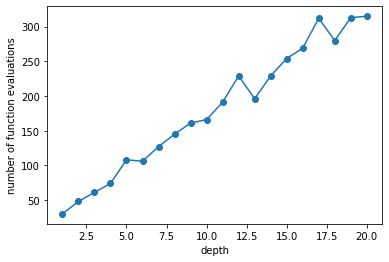

In [16]:
_=pl.plot(np.arange(1,maxdepth+1),qaoamc.num_fval.values(),"o-")
_=pl.ylabel('number of function evaluations')
_=pl.xlabel('depth')

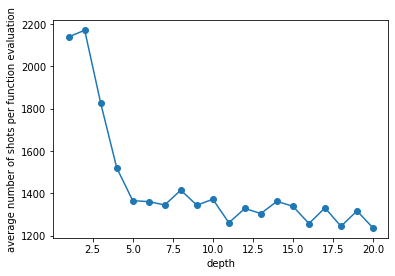

In [17]:
_=pl.plot(np.arange(1,maxdepth+1),np.array(list(qaoamc.num_shots.values()))/np.array(list(qaoamc.num_fval.values())),"o-")
_=pl.ylabel('average number of shots per function evaluation')
_=pl.xlabel('depth')